# Radial distribution functions

Here we calculate the radial distribution functions between two groups of atoms.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests


<div class="alert alert-info">
    
**Note**

The elastic network analysis follows the approach of [(Hall *et al.*, 2007)](#References). Please cite them when using the ``MDAnalysis.analysis.gnm`` module in published work.

</div>

In [4]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[4]](#References)

In [5]:
u = mda.Universe(TPR, XTC)

## Calculating the average radial distribution function

A radial distribution function describes the time-averaged density of particles from the reference group.

Below, I calculate the average RDF between each atom of residue 60 to each atom of water to look at the distribution of water over the trajectory.

In [19]:
res60 = u.select_atoms('resid 60')
water = u.select_atoms('resname SOL')

irdf = rdf.InterRDF(res60, water,
                    nbins=75,  # default
                    range=(0.0, 15.0)  # distance
                   )
irdf.run()

The distance bins are available at `irdf.bins` and the radial cumulative distribution function is at `irdf.rdf`. 

In [20]:
irdf.bins

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9])

Text(0, 0.5, 'Radial cumulative distribution')

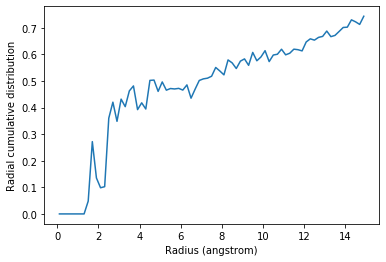

In [25]:
plt.plot(irdf.bins, irdf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')

## Site-specific radial distribution functions

## References

[1] R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, doi: [10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2] N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, [doi:10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3] Benjamin A. Hall, Samantha L. Kaye, Andy Pang, Rafael Perera, and Philip C. Biggin. Characterization of Protein Conformational States by Normal-Mode Frequencies. *JACS* 129 (2007), 11394–11401.

[4] Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)

